In [ ]:
## Name: Jingwen Ji
## Student ID: 1006128101

In [1]:
!pip install pingouin
!pip install dfply

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.4/612.4 kB 8.4 MB/s eta 0:00:00


In [92]:
import pandas as pd
import numpy as np
from pingouin import ancova
import matplotlib.pyplot as plt
from dfply import *
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro, levene
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd


In [60]:
df = pd.read_csv('INF2178_A3_data.csv')
df.head()

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomeinthousands,incomegroup
0,36.58,39.54,33.822,49.37,50.10,40.533,140000.0,140.0,3
1,50.82,44.44,38.147,83.50,58.93,37.409,120000.0,120.0,3
2,40.68,28.57,28.108,40.41,32.81,29.312,90000.0,90.0,3
3,32.57,23.57,15.404,34.14,35.25,27.382,50000.0,50.0,2
4,31.98,19.65,18.727,32.84,23.60,26.977,55000.0,55.0,2


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11933 entries, 0 to 11932
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   fallreadingscore             11933 non-null  float64
 1   fallmathscore                11933 non-null  float64
 2   fallgeneralknowledgescore    11933 non-null  float64
 3   springreadingscore           11933 non-null  float64
 4   springmathscore              11933 non-null  float64
 5   springgeneralknowledgescore  11933 non-null  float64
 6   totalhouseholdincome         11933 non-null  float64
 7   incomeinthousands            11933 non-null  float64
 8   incomegroup                  11933 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 839.2 KB


In [62]:
# Checking for missing data in the updated dataset
missing_data = df.isnull().sum()

# Display the count of missing values for each column
missing_data

fallreadingscore               0
fallmathscore                  0
fallgeneralknowledgescore      0
springreadingscore             0
springmathscore                0
springgeneralknowledgescore    0
totalhouseholdincome           0
incomeinthousands              0
incomegroup                    0
dtype: int64

In [67]:
# Modifying the DataFrame columns names
df.columns = ['Fall_Reading_Score' if col == 'fallreadingscore' else
              'Fall_Math_Score' if col == 'fallmathscore' else
              'Fall_General_Knowledge_Score' if col == 'fallgeneralknowledgescore' else
              'Spring_Reading_Score' if col == 'springreadingscore' else
              'Spring_Math_Score' if col == 'springmathscore' else
              'Spring_General_Knowledge_Score' if col == 'springgeneralknowledgescore' else
              'Total_Household_Income' if col == 'totalhouseholdincome' else
              'Income_In_Thousands' if col == 'incomeinthousands' else
              'Income_Group' if col == 'incomegroup' else col for col in df.columns]

# Display the dataframe
df.head()


,Fall_Reading_Score,Fall_Math_Score,Fall_General_Knowledge_Score,Spring_Reading_Score,Spring_Math_Score,Spring_General_Knowledge_Score,Total_Household_Income,Income_In_Thousands,Income_Group
0,36.58,39.54,33.822,49.37,50.10,40.533,140000.0,140.0,3
1,50.82,44.44,38.147,83.50,58.93,37.409,120000.0,120.0,3
2,40.68,28.57,28.108,40.41,32.81,29.312,90000.0,90.0,3
3,32.57,23.57,15.404,34.14,35.25,27.382,50000.0,50.0,2
4,31.98,19.65,18.727,32.84,23.60,26.977,55000.0,55.0,2


**Exploratory Data Analysis**

In [69]:
# Exclude columns related to income for the descriptive statistics calculation
income_related_cols = [col for col in df.columns if "income" in col.lower()]
non_income_cols = [col for col in df.columns if col not in income_related_cols]

# Calculate descriptive statistics for non-income related continuous variables
descriptive_stats_non_income = df[non_income_cols].describe()

# Display the descriptive statistics
descriptive_stats_non_income


,Fall_Reading_Score,Fall_Math_Score,Fall_General_Knowledge_Score,Spring_Reading_Score,Spring_Math_Score,Spring_General_Knowledge_Score
count,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000
mean,35.954215,27.128244,23.073694,47.511178,37.799461,28.235584
std,10.473130,9.120505,7.396978,14.327111,12.027753,7.577457
min,21.010000,10.510000,6.985000,22.350000,11.900000,7.858000
25%,29.340000,20.680000,17.385000,38.950000,29.270000,22.802000
50%,34.060000,25.680000,22.954000,45.320000,36.410000,28.583000
75%,39.890000,31.590000,28.305000,51.770000,44.220000,33.782000
max,138.510000,115.650000,47.691000,156.850000,113.800000,48.345000


In [70]:
# Distribution of 'Total_Household_Income'
income_distribution = df['Total_Household_Income'].describe()

# Range for each 'Income_Group'
income_group_ranges = df.groupby('Income_Group')['Total_Household_Income'].agg(['min', 'max'])

income_distribution, income_group_ranges


(count     11933.000000
 mean      54317.199930
 std       36639.061147
 min           1.000000
 25%       27000.000000
 50%       47000.000000
 75%       72000.000000
 max      150000.000000
 Name: Total_Household_Income, dtype: float64,
                   min       max
 Income_Group                   
 1                 1.0   39800.0
 2             40000.0   69700.0
 3             70000.0  150000.0)

In [71]:
# Map the income in numbers to align with the 'Income_Group' column
income_group_range = {
    1: "1.0-39800",
    2: "40000-69700",
    3: "70000-150000"
}

# Apply the  mapping
df["Income_Group_Range"] = df["Income_Group"].map(income_group_range)

# Display the first few rows of the updated dataframe
df.head()


,Fall_Reading_Score,Fall_Math_Score,Fall_General_Knowledge_Score,Spring_Reading_Score,Spring_Math_Score,Spring_General_Knowledge_Score,Total_Household_Income,Income_In_Thousands,Income_Group,Income_Group_Range
0,36.58,39.54,33.822,49.37,50.10,40.533,140000.0,140.0,3,70000-150000
1,50.82,44.44,38.147,83.50,58.93,37.409,120000.0,120.0,3,70000-150000
2,40.68,28.57,28.108,40.41,32.81,29.312,90000.0,90.0,3,70000-150000
3,32.57,23.57,15.404,34.14,35.25,27.382,50000.0,50.0,2,40000-69700
4,31.98,19.65,18.727,32.84,23.60,26.977,55000.0,55.0,2,40000-69700


In [72]:
# Calculating the frequency and percentage of each income mapping aligning with the income group
income_group_counts = df['Income_Group_Range'].value_counts()
income_group_percentage = (df['Income_Group_Range'].value_counts(normalize=True) * 100).round(2)

# Combine counts and percentages into a single DataFrame
income_group_summary = pd.DataFrame({
    'Counts': income_group_counts,
    'Percentage': income_group_percentage
}).sort_index()  # Sorting by index to align with income group order

income_group_summary



,Counts,Percentage
1.0-39800,4729,39.63
40000-69700,3726,31.22
70000-150000,3478,29.15


In [73]:
# Calculate the changes of scores
df["Change_in_General_Knowledge_Score"] = df["Spring_General_Knowledge_Score"] - df["Fall_General_Knowledge_Score"]
df["Change_in_Reading_Score"] = df["Spring_Reading_Score"] - df["Fall_Reading_Score"]
df["Change_in_Math_Score"] = df["Spring_Math_Score"] - df["Fall_Math_Score"]

# Display the first few rows of the updated dataframe
df.head()


,Fall_Reading_Score,Fall_Math_Score,Fall_General_Knowledge_Score,Spring_Reading_Score,Spring_Math_Score,Spring_General_Knowledge_Score,Total_Household_Income,Income_In_Thousands,Income_Group,Income_Group_Range,Change_in_General_Knowledge_Score,Change_in_Reading_Score,Change_in_Math_Score
0,36.58,39.54,33.822,49.37,50.10,40.533,140000.0,140.0,3,70000-150000,6.711,12.79,10.56
1,50.82,44.44,38.147,83.50,58.93,37.409,120000.0,120.0,3,70000-150000,-0.738,32.68,14.49
2,40.68,28.57,28.108,40.41,32.81,29.312,90000.0,90.0,3,70000-150000,1.204,-0.27,4.24
3,32.57,23.57,15.404,34.14,35.25,27.382,50000.0,50.0,2,40000-69700,11.978,1.57,11.68
4,31.98,19.65,18.727,32.84,23.60,26.977,55000.0,55.0,2,40000-69700,8.250,0.86,3.95


In [107]:
# Calculate the descriptive statistics for changes in scores for each income group
descriptive_stats_changes_by_income_group = df.groupby('Income_Group_Range')[['Change_in_General_Knowledge_Score', 'Change_in_Reading_Score', 'Change_in_Math_Score']].describe()

# Create a summary of the descriptive statistics
descriptive_summary = {}

for score in ['Change_in_General_Knowledge_Score', 'Change_in_Reading_Score', 'Change_in_Math_Score']:
    descriptive_summary[score] = descriptive_stats_changes_by_income_group[score][['mean', 'std', 'min', 'max']]

# Convert the summary into a DataFrame for better readability
descriptive_summary_df = pd.concat(descriptive_summary, axis=1)
descriptive_summary_df


Change_in_General_Knowledge_Score                    \
                                                mean       std     min   
Income_Group_Range                                                       
1.0-39800                                   5.121809  4.075088 -12.243   
40000-69700                                 5.255720  4.056299 -14.183   
70000-150000                                5.115866  4.025265  -9.413   

                           Change_in_Reading_Score                          \
                       max                    mean       std    min    max   
Income_Group_Range                                                           
1.0-39800           27.785               10.878279  7.462176  -9.66  91.94   
40000-69700         22.662               11.716932  7.906122 -44.76  76.55   
70000-150000        27.451               12.308387  8.967606 -41.23  88.56   

                   Change_in_Math_Score                          
                                   mean       std    min    max  
Income_Group_Range                                               
1.0-39800                      9.958547  6.406540  -9.44  56.39  
40000-69700                   10.896224  6.853736 -22.16  75.35  
70000-150000                  11.399178  7.339003 -19.35  53.94

<ipython-input-79-14312dce3475>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Income_Group_Range', y='Fall_Reading_Score', data=df, palette='Set3')
<ipython-input-79-14312dce3475>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Income_Group_Range', y='Spring_Reading_Score', data=df, palette='Set3')
<ipython-input-79-14312dce3475>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Income_Group_Range', y='Fall_Math_Score', data=df, palette='Set3')
<ipython-input-79-14312dce3475>:37: FutureWarning: 

Passing `palette` without assi

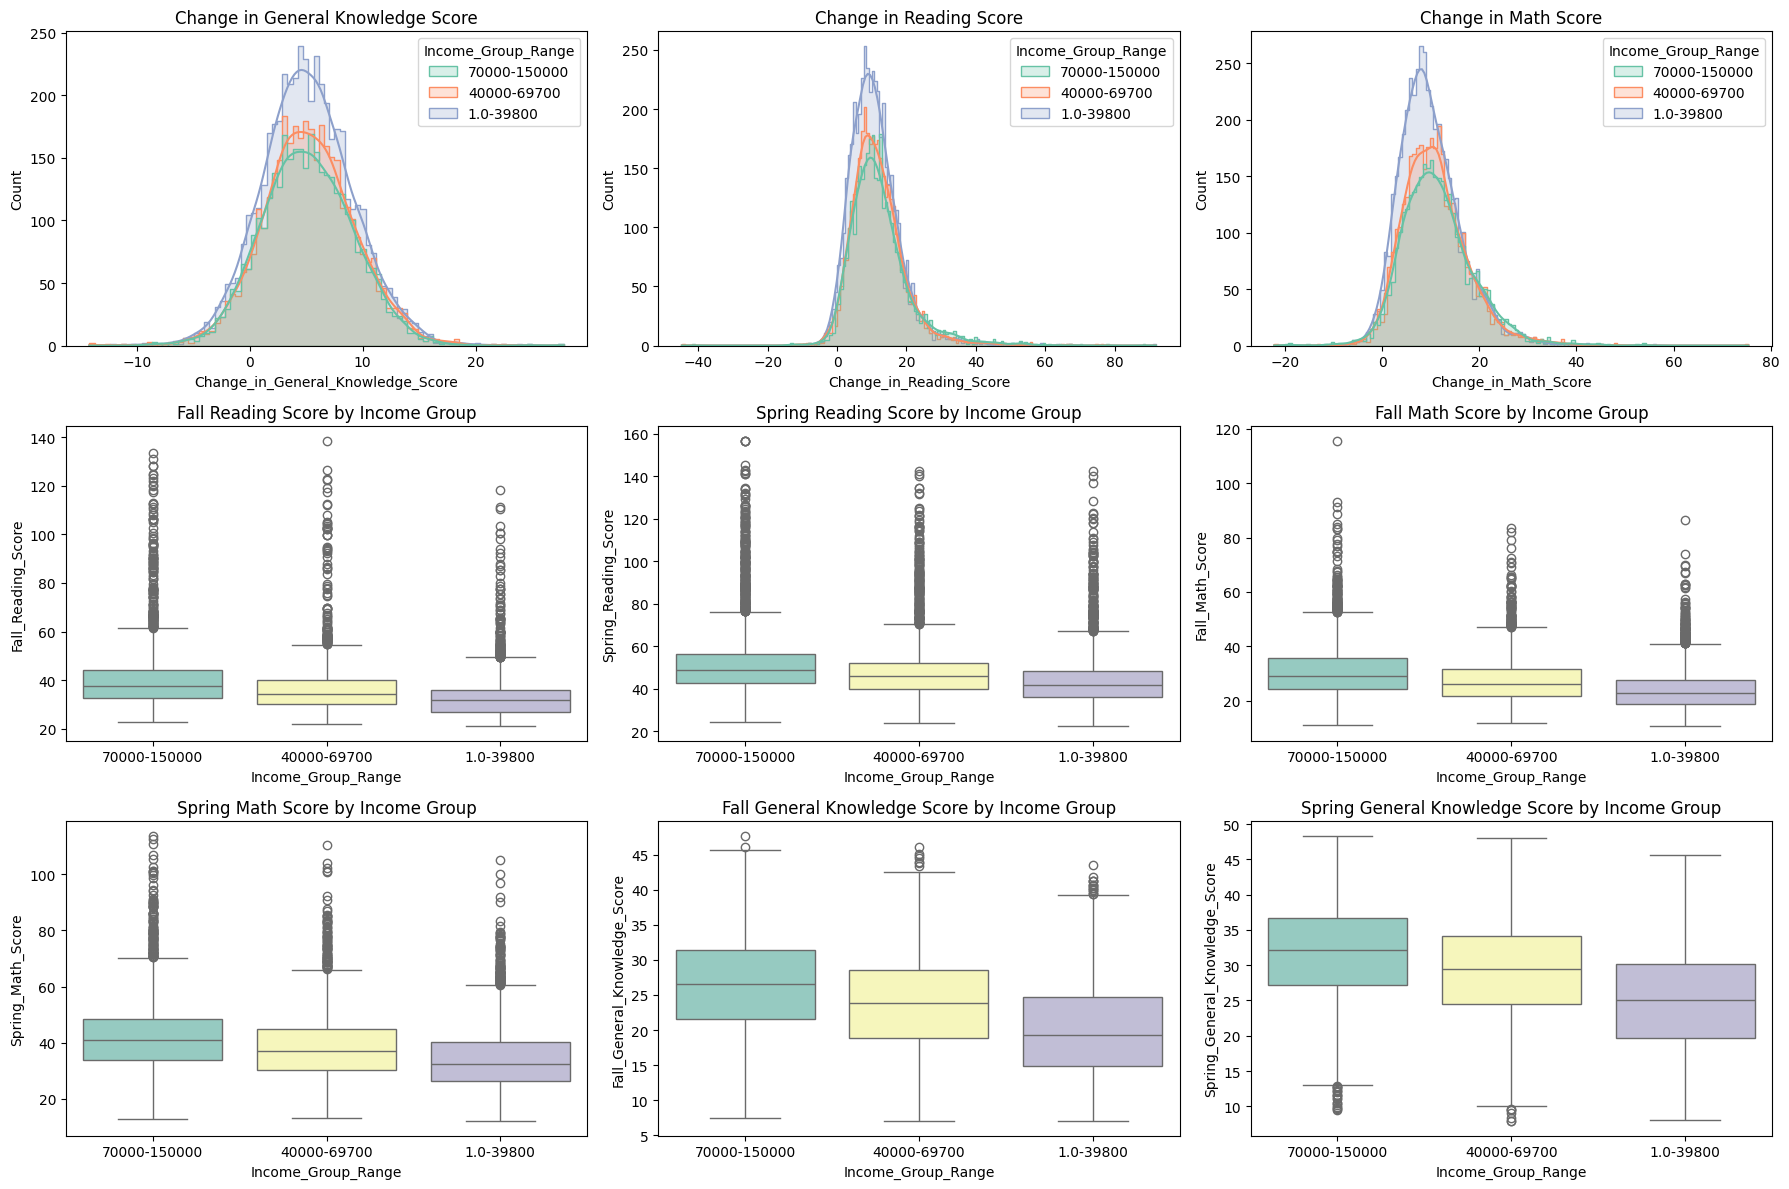

In [79]:
# Setting up the figure size and layout
plt.figure(figsize=(18, 12))

# Histogram of Change in General Knowledge Score by Income Groups
plt.subplot(3, 3, 1)
sns.histplot(data=df, x='Change_in_General_Knowledge_Score', hue='Income_Group_Range', kde=True, element='step', palette='Set2')
plt.title('Change in General Knowledge Score')

# Histogram of Change in Reading Score by Income Groups
plt.subplot(3, 3, 2)
sns.histplot(data=df, x='Change_in_Reading_Score', hue='Income_Group_Range', kde=True, element='step', palette='Set2')
plt.title('Change in Reading Score')

# Histogram of Change in Math Score by Income Groups
plt.subplot(3, 3, 3)
sns.histplot(data=df, x='Change_in_Math_Score', hue='Income_Group_Range', kde=True, element='step', palette='Set2')
plt.title('Change in Math Score')

# Boxplots of different scores in different seasons grouped by income group
# Fall Reading Score
plt.subplot(3, 3, 4)
sns.boxplot(x='Income_Group_Range', y='Fall_Reading_Score', data=df, palette='Set3')
plt.title('Fall Reading Score by Income Group')

# Spring Reading Score
plt.subplot(3, 3, 5)
sns.boxplot(x='Income_Group_Range', y='Spring_Reading_Score', data=df, palette='Set3')
plt.title('Spring Reading Score by Income Group')

# Fall Math Score
plt.subplot(3, 3, 6)
sns.boxplot(x='Income_Group_Range', y='Fall_Math_Score', data=df, palette='Set3')
plt.title('Fall Math Score by Income Group')

# Spring Math Score
plt.subplot(3, 3, 7)
sns.boxplot(x='Income_Group_Range', y='Spring_Math_Score', data=df, palette='Set3')
plt.title('Spring Math Score by Income Group')

# Fall General Knowledge Score
plt.subplot(3, 3, 8)
sns.boxplot(x='Income_Group_Range', y='Fall_General_Knowledge_Score', data=df, palette='Set3')
plt.title('Fall General Knowledge Score by Income Group')

# Spring General Knowledge Score
plt.subplot(3, 3, 9)
sns.boxplot(x='Income_Group_Range', y='Spring_General_Knowledge_Score', data=df, palette='Set3')
plt.title('Spring General Knowledge Score by Income Group')

plt.tight_layout()
plt.show()


In [80]:
# Categorize 'Fall_General_Knowledge_Score' into 'Low', 'Medium', 'High'
df['General_Knowledge_Category'] = pd.qcut(df['Fall_General_Knowledge_Score'], 3, labels=['Low', 'Medium', 'High'])

# Display the updated dataframe
df.head()



,Fall_Reading_Score,Fall_Math_Score,Fall_General_Knowledge_Score,Spring_Reading_Score,Spring_Math_Score,Spring_General_Knowledge_Score,Total_Household_Income,Income_In_Thousands,Income_Group,Income_Group_Range,Change_in_General_Knowledge_Score,Change_in_Reading_Score,Change_in_Math_Score,General_Knowledge_Category
0,36.58,39.54,33.822,49.37,50.10,40.533,140000.0,140.0,3,70000-150000,6.711,12.79,10.56,High
1,50.82,44.44,38.147,83.50,58.93,37.409,120000.0,120.0,3,70000-150000,-0.738,32.68,14.49,High
2,40.68,28.57,28.108,40.41,32.81,29.312,90000.0,90.0,3,70000-150000,1.204,-0.27,4.24,High
3,32.57,23.57,15.404,34.14,35.25,27.382,50000.0,50.0,2,40000-69700,11.978,1.57,11.68,Low
4,31.98,19.65,18.727,32.84,23.60,26.977,55000.0,55.0,2,40000-69700,8.250,0.86,3.95,Low


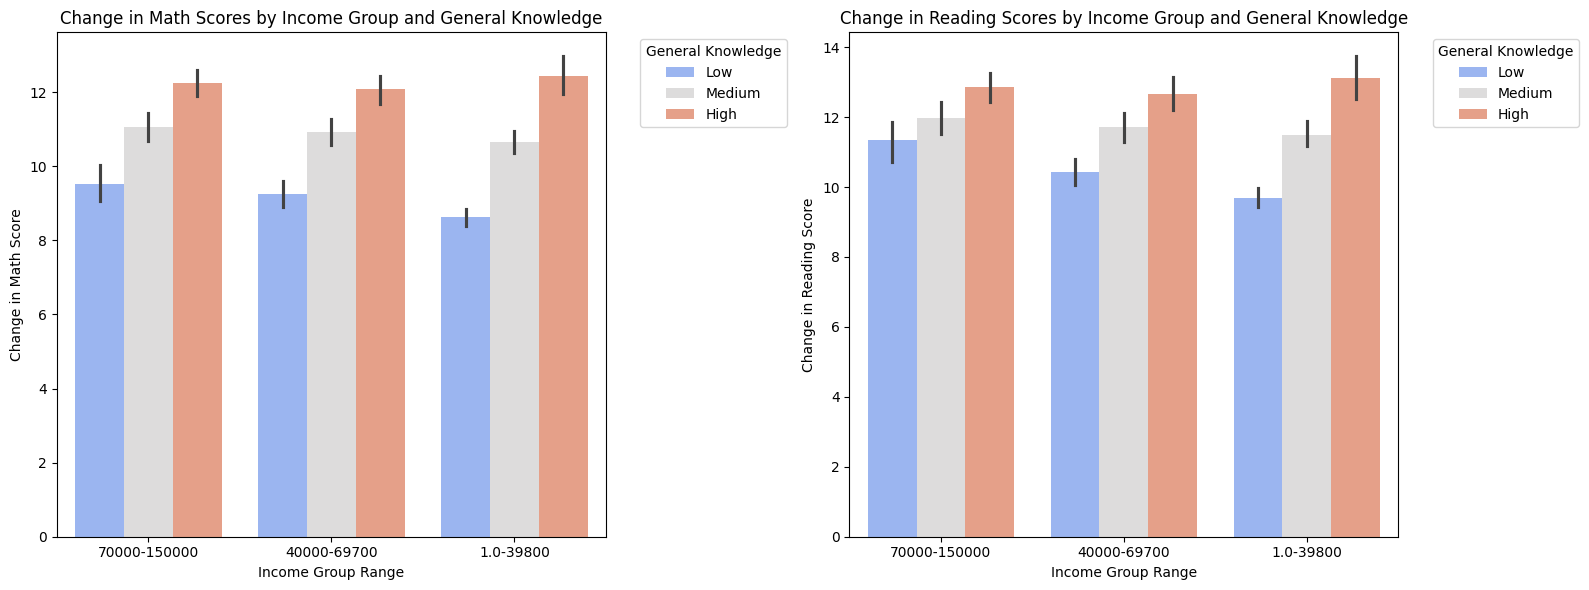

In [83]:
# Set up the figure size and layout for visualizations
plt.figure(figsize=(16, 6))

# Plot Change in Math Scores based on Income Group and General Knowledge Category
plt.subplot(1, 2, 1)
math_plot = sns.barplot(x='Income_Group_Range', y='Change_in_Math_Score', hue='General_Knowledge_Category', data=df, palette='coolwarm')
plt.title('Change in Math Scores by Income Group and General Knowledge')
plt.xlabel('Income Group Range')
plt.ylabel('Change in Math Score')
plt.legend(title='General Knowledge', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot Change in Reading Scores based on Income Group and General Knowledge Category
plt.subplot(1, 2, 2)
reading_plot = sns.barplot(x='Income_Group_Range', y='Change_in_Reading_Score', hue='General_Knowledge_Category', data=df, palette='coolwarm')
plt.title('Change in Reading Scores by Income Group and General Knowledge')
plt.xlabel('Income Group Range')
plt.ylabel('Change in Reading Score')
plt.legend(title='General Knowledge', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

**ANCOVA**

In [88]:
# Perform the one-way ANCOVA for the hypothesis: Are the math scores from fall to spring impacted by the level of income controlling for the impact of general knowledge?

# Fit the model
math_model_ancova = ols('Change_in_Math_Score ~ C(Income_Group) + Fall_General_Knowledge_Score', data=df).fit()

# Obtain residuals from the fitted model
math_residuals = math_model_ancova.resid

# Perform ANCOVA and obtain the results
math_ancova_results = sm.stats.anova_lm(math_model_ancova, typ=2)

# Display the results
print("Model Summary:")
print(math_model_ancova.summary())
print("\nResiduals:")
print(math_residuals.head())
print("\nANCOVA Results:")
print(math_ancova_results)



Model Summary:
                             OLS Regression Results                             
Dep. Variable:     Change_in_Math_Score   R-squared:                       0.048
Model:                              OLS   Adj. R-squared:                  0.048
Method:                   Least Squares   F-statistic:                     200.0
Date:                  Sun, 24 Mar 2024   Prob (F-statistic):          1.36e-126
Time:                          00:11:11   Log-Likelihood:                -39610.
No. Observations:                 11933   AIC:                         7.923e+04
Df Residuals:                     11929   BIC:                         7.926e+04
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

**Check the Assumption**

In [98]:
# Assumption 1: Normality of residuals using the Shapiro-Wilk test
shapiro_test_math_resid = shapiro(math_model_ancova.resid)

# Assumption 2: Homogeneity of variances (homoscedasticity) using Levene's test
groups = df['Income_Group'].unique()
grouped_residuals = [math_model_ancova.resid[df['Income_Group'] == g] for g in groups]
levene_test_math_resid = levene(*grouped_residuals)

# Display the test results
print("Shapiro_Wilk test:")
print(shapiro_test_math_resid)
print("\nLevene test:")
print(levene_test_math_resid)


Shapiro_Wilk test:
ShapiroResult(statistic=0.9664044380187988, pvalue=0.0)

Levene test:
LeveneResult(statistic=30.222316430496164, pvalue=8.086366997974491e-14)


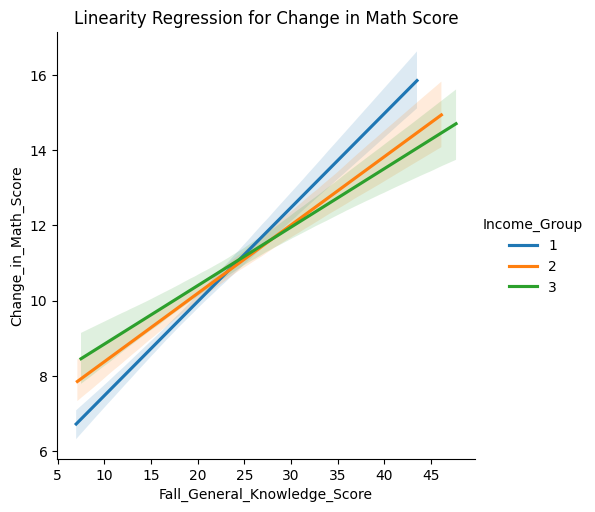

In [104]:
# Create plot with regression line
sns.lmplot(x='Fall_General_Knowledge_Score', y='Change_in_Math_Score', hue='Income_Group', data=df, scatter=False)
plt.title('Linearity Regression for Change in Math Score')

# Show the plot
plt.show()

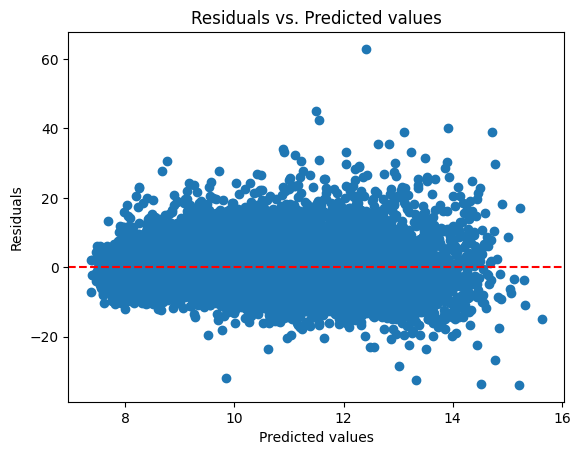

In [91]:
# Assumption 3: Linearity of relationship between the covariate and the dependent variable
plt.scatter(math_model_ancova.fittedvalues, math_model_ancova.resid)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted values')
plt.show()


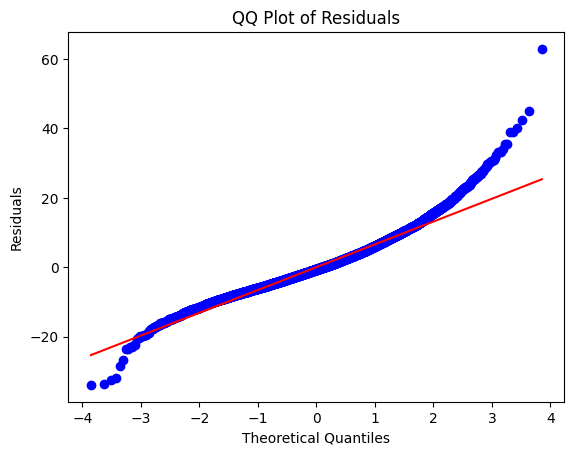

Tukey HSD Results:
     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
   group1      group2    meandiff p-adj  lower  upper  reject
-------------------------------------------------------------
  1.0-39800  40000-69700   0.9377    0.0 0.5871 1.2883   True
  1.0-39800 70000-150000   1.4406    0.0 1.0831 1.7982   True
40000-69700 70000-150000    0.503 0.0051 0.1256 0.8803   True
-------------------------------------------------------------


In [93]:
# Tukey HSD test on residuals
tukey_results = pairwise_tukeyhsd(df['Change_in_Math_Score'], df['Income_Group_Range'])

# Plot QQ plot of residuals
stats.probplot(math_residuals, dist="norm", plot=plt)
plt.title('QQ Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Residuals')
plt.show()

# Display Tukey HSD results
print("Tukey HSD Results:")
print(tukey_results)

**ANCOVA**

In [96]:
# Perform the one-way ANCOVA for the hypothesis: Are the reading scores from fall to spring impacted by the level of income controlling for the impact of general knowledge?

# Fit the model
reading_model_ancova = ols('Change_in_Reading_Score ~ C(Income_Group) + Fall_General_Knowledge_Score', data=df).fit()

# Obtain residuals from the fitted model
reading_residuals = reading_model_ancova.resid

# Perform ANCOVA and obtain the results
reading_ancova_results = sm.stats.anova_lm(reading_model_ancova, typ=2)

# Display the results
print("Model Summary:")
print(reading_model_ancova.summary())
print("\nResiduals:")
print(reading_residuals.head())
print("\nANCOVA Results:")
print(reading_ancova_results)

Model Summary:
                               OLS Regression Results                              
Dep. Variable:     Change_in_Reading_Score   R-squared:                       0.023
Model:                                 OLS   Adj. R-squared:                  0.023
Method:                      Least Squares   F-statistic:                     95.49
Date:                     Sun, 24 Mar 2024   Prob (F-statistic):           4.52e-61
Time:                             00:33:21   Log-Likelihood:                -41730.
No. Observations:                    11933   AIC:                         8.347e+04
Df Residuals:                        11929   BIC:                         8.350e+04
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

**Check the Assumption**

In [99]:
# Assumption 1: Normality of residuals using the Shapiro-Wilk test
shapiro_test_reading_resid = shapiro(reading_model_ancova.resid)

# Assumption 2: Homogeneity of variances (homoscedasticity) using Levene's test
groups = df['Income_Group'].unique()
grouped_residuals = [reading_model_ancova.resid[df['Income_Group'] == g] for g in groups]
levene_test_reading_resid = levene(*grouped_residuals)

# Display the test results
print("Shapiro_Wilk test:")
print(shapiro_test_reading_resid)
print("\nLevene test:")
print(levene_test_reading_resid)

Shapiro_Wilk test:
ShapiroResult(statistic=0.8996317386627197, pvalue=0.0)

Levene test:
LeveneResult(statistic=26.95581105143925, pvalue=2.0874303125475515e-12)


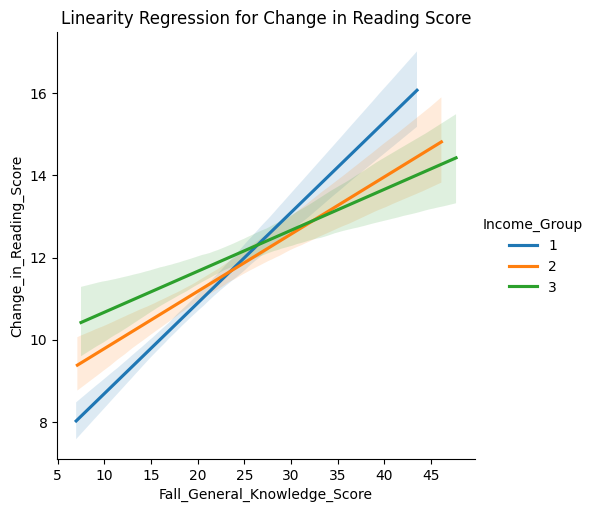

In [105]:
# Create plot with regression line
sns.lmplot(x='Fall_General_Knowledge_Score', y='Change_in_Reading_Score', hue='Income_Group', data=df, scatter=False)
plt.title('Linearity Regression for Change in Reading Score')

# Show the plot
plt.show()

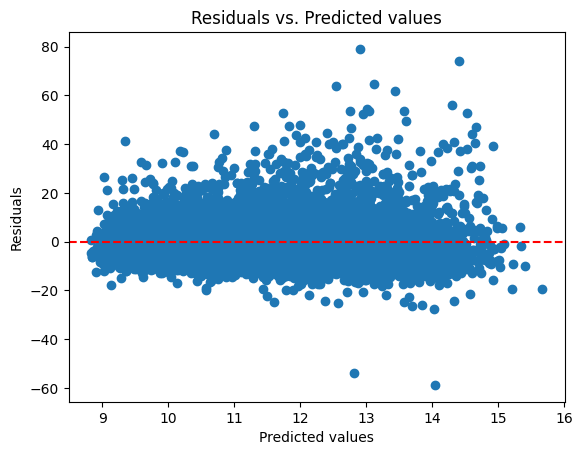

In [100]:
# Assumption 3: Linearity of relationship between the covariate and the dependent variable
plt.scatter(reading_model_ancova.fittedvalues, reading_model_ancova.resid)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted values')
plt.show()

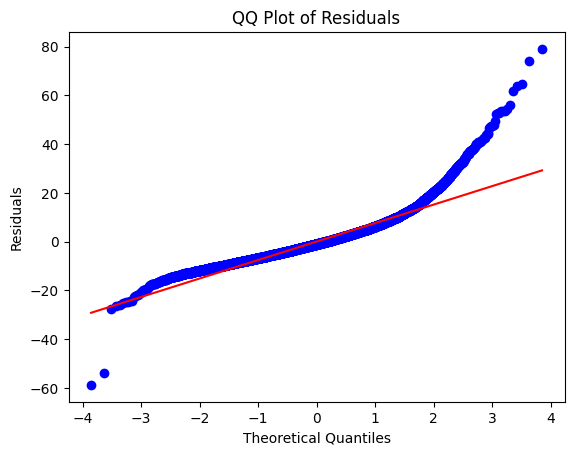

Tukey HSD Results:
     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
   group1      group2    meandiff p-adj  lower  upper  reject
-------------------------------------------------------------
  1.0-39800  40000-69700   0.8387    0.0 0.4246 1.2527   True
  1.0-39800 70000-150000   1.4301    0.0 1.0079 1.8523   True
40000-69700 70000-150000   0.5915 0.0053 0.1458 1.0371   True
-------------------------------------------------------------


In [101]:
# Tukey HSD test on residuals
tukey_results = pairwise_tukeyhsd(df['Change_in_Reading_Score'], df['Income_Group_Range'])

# Plot QQ plot of residuals
stats.probplot(reading_residuals, dist="norm", plot=plt)
plt.title('QQ Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Residuals')
plt.show()

# Display Tukey HSD results
print("Tukey HSD Results:")
print(tukey_results)

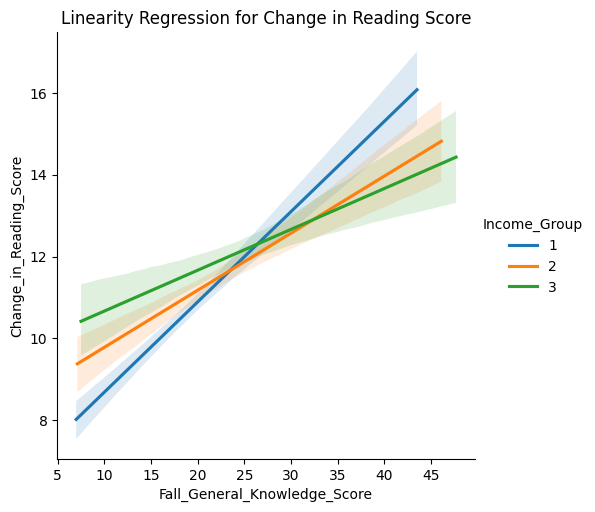

In [103]:
# Create scatter plot with regression line
sns.lmplot(x='Fall_General_Knowledge_Score', y='Change_in_Reading_Score', hue='Income_Group', data=df, scatter=False)

# Add title
plt.title('Linearity Regression for Change in Reading Score')

# Show the plot
plt.show()